# Installing Dependancies

In [86]:
import gpxpy
import gpxpy.gpx

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from geopy.distance import distance
from geopy.distance import geodesic
from geopy import distance
import math

import haversine as hs
import numpy as np

import datetime
from time import strftime
from time import gmtime



plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [87]:

with open('Routes/DD100K_2021.gpx', 'r') as gpx_file:
    DDgpx = gpxpy.parse(gpx_file)

In [88]:
DDgpx

GPX(tracks=[GPXTrack(name='Prince William County Trail Running', segments=[GPXTrackSegment(points=[...])])])

In [89]:
DDgpx.get_track_points_no()

59640

# Loading a GPX file

In [90]:
# Loading a GPX file
with open('Routes/2-loop_mtvernon.gpx', 'r') as gpx_file:
    loop2gpx = gpxpy.parse(gpx_file)

In [91]:

print(loop2gpx.get_track_points_no())
print(loop2gpx.get_elevation_extremes())
print(loop2gpx.get_uphill_downhill())
print('# of tracks - ',len(loop2gpx.tracks))
print('# of segments - ',len(loop2gpx.tracks[0].segments))

4304
MinimumMaximum(minimum=-27.200000762939453, maximum=28.399999618530273)
UphillDownhill(uphill=284.19998838156533, downhill=302.59998800009583)
# of tracks -  1
# of segments -  1


In [92]:
loop2gpx.tracks[0].segments[0].points[:4]

[GPXTrackPoint(38.79649353213608, -77.04552322626114, elevation=-3.0, time=datetime.datetime(2021, 11, 19, 14, 52, 53, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(38.79648883827031, -77.04551886767149, elevation=-3.0, time=datetime.datetime(2021, 11, 19, 14, 52, 54, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(38.796473080292344, -77.04550998285413, elevation=-3.0, time=datetime.datetime(2021, 11, 19, 14, 52, 55, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(38.79645690321922, -77.04550285823643, elevation=-3.0, time=datetime.datetime(2021, 11, 19, 14, 52, 56, tzinfo=SimpleTZ("Z")))]

In [93]:
# making a dictionary that can be converted to Pandas Dataframe
route_info=[]

for track in DDgpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'time': point.time,
                'latitude': point.latitude,
                'longitude':point.longitude,
                'elevation': point.elevation
            })

route_info[:3]

[{'time': datetime.datetime(2021, 12, 4, 11, 31, 3, tzinfo=SimpleTZ("Z")),
  'latitude': 38.576125083491206,
  'longitude': -77.41298032924533,
  'elevation': 98.0},
 {'time': datetime.datetime(2021, 12, 4, 11, 31, 4, tzinfo=SimpleTZ("Z")),
  'latitude': 38.576110918074846,
  'longitude': -77.41298879496753,
  'elevation': 98.0},
 {'time': datetime.datetime(2021, 12, 4, 11, 31, 5, tzinfo=SimpleTZ("Z")),
  'latitude': 38.576098177582026,
  'longitude': -77.4129987694323,
  'elevation': 98.0}]

In [94]:
df = pd.DataFrame(route_info)
df.head()

,time,latitude,longitude,elevation
0,2021-12-04 11:31:03+00:00,38.576125,-77.412980,98.0
1,2021-12-04 11:31:04+00:00,38.576111,-77.412989,98.0
2,2021-12-04 11:31:05+00:00,38.576098,-77.412999,98.0
3,2021-12-04 11:31:06+00:00,38.576086,-77.413008,98.0
4,2021-12-04 11:31:07+00:00,38.576070,-77.413020,98.0


# Create Simple BASE CSV file

In [95]:

df.to_csv('data/df.csv', index=False)

# Simple plots

## Plot the Route

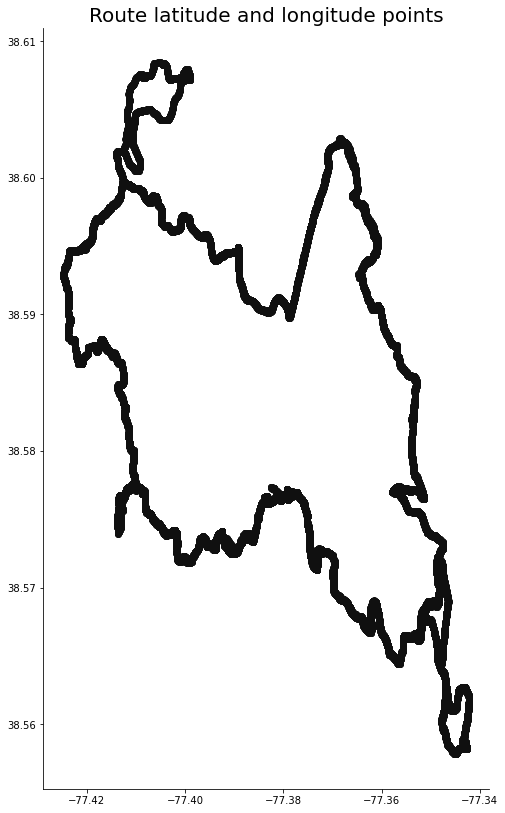

In [96]:
plt.figure(figsize=(8, 14))
plt.scatter(df['longitude'], df['latitude'], color='#101010')
plt.title('Route latitude and longitude points', size=20);

## Plot the Elevation

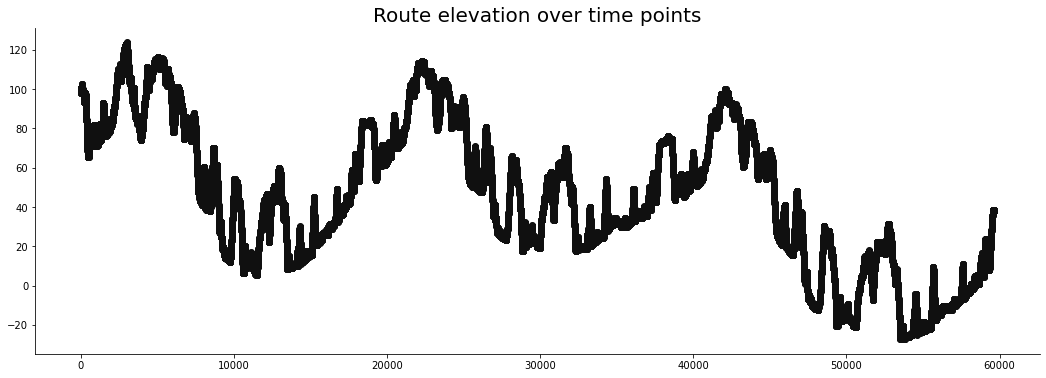

In [97]:
plt.figure(figsize=(18,6))
plt.scatter(df.index, df['elevation'], color='#101010')
plt.title('Route elevation over time points', size=20);

In [98]:
df.head()

,time,latitude,longitude,elevation
0,2021-12-04 11:31:03+00:00,38.576125,-77.412980,98.0
1,2021-12-04 11:31:04+00:00,38.576111,-77.412989,98.0
2,2021-12-04 11:31:05+00:00,38.576098,-77.412999,98.0
3,2021-12-04 11:31:06+00:00,38.576086,-77.413008,98.0
4,2021-12-04 11:31:07+00:00,38.576070,-77.413020,98.0


In [99]:
pointxyz = []
for i in range(0,len(df)):
    pointxyz.append((df['latitude'][i], df['longitude'][i], df['elevation'][i]))

pointxyz[0]

(38.576125083491206, -77.41298032924533, 98.0)

In [100]:
df['pointxyz']= pd.Series(pointxyz)
df.head()

,time,latitude,longitude,elevation,pointxyz
0,2021-12-04 11:31:03+00:00,38.576125,-77.412980,98.0,"(38.576125083491206, -77.41298032924533, 98.0)"
1,2021-12-04 11:31:04+00:00,38.576111,-77.412989,98.0,"(38.576110918074846, -77.41298879496753, 98.0)"
2,2021-12-04 11:31:05+00:00,38.576098,-77.412999,98.0,"(38.576098177582026, -77.4129987694323, 98.0)"
3,2021-12-04 11:31:06+00:00,38.576086,-77.413008,98.0,"(38.5760856885463, -77.4130077380687, 98.0)"
4,2021-12-04 11:31:07+00:00,38.576070,-77.413020,98.0,"(38.576070349663496, -77.41301955655217, 98.0)"


# Distance Calcs

## Geodesic

In [101]:
b_latlon = df['pointxyz'][1+1][:2]
a_latlon = df['pointxyz'][1][:2]
print(b_latlon,a_latlon)
print(geodesic(a_latlon,b_latlon).miles)

(38.576098177582026, -77.4129987694323) (38.576110918074846, -77.41298879496753)
0.0010314937920102975


In [102]:
# Get Step distance, i.e. distance between points.
euc_dist = [0]
# fl_dist =[0]

for i in range(len(df)-1):
    
    b_latlon = df['pointxyz'][i+1][:2]
    a_latlon = df['pointxyz'][i][:2]

    # OG elevation in meters (1000m = .6 miles)  so change meters into km and then convert to miles
    b_elv = df['pointxyz'][i+1][2]/1000*.6
    a_elv = df['pointxyz'][i][2]/1000*.6
    eldiff = b_elv-a_elv

    flat_distance =geodesic(a_latlon,b_latlon).miles
    # fl_dist.append(flat_distance)

    euc_distance = math.sqrt(flat_distance**2 + eldiff**2)
    euc_dist.append(euc_distance)

df['euc_dist'] = pd.Series(euc_dist)
# df['flat_dist'] = pd.Series(fl_dist)

df.head()


,time,latitude,longitude,elevation,pointxyz,euc_dist
0,2021-12-04 11:31:03+00:00,38.576125,-77.412980,98.0,"(38.576125083491206, -77.41298032924533, 98.0)",0.000000
1,2021-12-04 11:31:04+00:00,38.576111,-77.412989,98.0,"(38.576110918074846, -77.41298879496753, 98.0)",0.001079
2,2021-12-04 11:31:05+00:00,38.576098,-77.412999,98.0,"(38.576098177582026, -77.4129987694323, 98.0)",0.001031
3,2021-12-04 11:31:06+00:00,38.576086,-77.413008,98.0,"(38.5760856885463, -77.4130077380687, 98.0)",0.000989
4,2021-12-04 11:31:07+00:00,38.576070,-77.413020,98.0,"(38.576070349663496, -77.41301955655217, 98.0)",0.001237


## Haversine

In [103]:
def haversine_distance(lat1, lon1, lat2, lon2) -> float:
    distance = hs.haversine(
        point1=(lat1,lon1),
        point2=(lat2,lon2),
        unit=hs.Unit.MILES
    )
    return np.round(distance,8)

In [104]:
haversine_distance(
    lat1=df.iloc[0]['latitude'],
    lon1=df.iloc[0]['longitude'],
    lat2=df.iloc[1]['latitude'],
    lon2=df.iloc[1]['longitude']
)

0.00108029

In [105]:
distances = [np.nan]

for i in range(len(df)):
    if i == 0:
        continue
    else:
        distances.append(haversine_distance(
            lat1=df.iloc[i - 1]['latitude'],
            lon1=df.iloc[i - 1]['longitude'],
            lat2=df.iloc[i]['latitude'],
            lon2=df.iloc[i]['longitude']
        ))

df['distance'] = distances
df.head()

,time,latitude,longitude,elevation,pointxyz,euc_dist,distance
0,2021-12-04 11:31:03+00:00,38.576125,-77.412980,98.0,"(38.576125083491206, -77.41298032924533, 98.0)",0.000000,NaN
1,2021-12-04 11:31:04+00:00,38.576111,-77.412989,98.0,"(38.576110918074846, -77.41298879496753, 98.0)",0.001079,0.001080
2,2021-12-04 11:31:05+00:00,38.576098,-77.412999,98.0,"(38.576098177582026, -77.4129987694323, 98.0)",0.001031,0.001032
3,2021-12-04 11:31:06+00:00,38.576086,-77.413008,98.0,"(38.5760856885463, -77.4130077380687, 98.0)",0.000989,0.000990
4,2021-12-04 11:31:07+00:00,38.576070,-77.413020,98.0,"(38.576070349663496, -77.41301955655217, 98.0)",0.001237,0.001237


In [106]:
df['distance'].sum()

67.02088915

#### Speed Calc

In [107]:
# 1 sec is 1/60th of minute and a minute is 1/60th of an hour so 

euc_speed = []

for i in range(len(df)):
    euc_mph = df['euc_dist'][i]/(1/60/60)
    euc_speed.append(euc_mph)

df['euc_mph'] = pd.Series(euc_speed)



In [108]:
df['euc_mph'].describe()

count    59640.000000
mean         4.066316
std          2.525913
min          0.000000
25%          2.906327
50%          3.935959
75%          5.036651
max        221.798116
Name: euc_mph, dtype: float64

In [109]:
df[df['euc_mph'] > 15]

,time,latitude,longitude,elevation,pointxyz,euc_dist,distance,euc_mph
2014,2021-12-04 12:04:37+00:00,38.589663,-77.423445,83.000000,"(38.589662946760654, -77.42344530299306, 83.0)",0.015828,0.015810,56.981684
2079,2021-12-04 12:05:42+00:00,38.590674,-77.423715,86.400002,"(38.59067405574024, -77.42371503263712, 86.400...",0.008251,0.008265,29.704942
3185,2021-12-04 12:24:08+00:00,38.604708,-77.411836,103.000000,"(38.60470804385841, -77.41183645091951, 103.0)",0.004250,0.004257,15.298533
5968,2021-12-04 13:10:31+00:00,38.595406,-77.394945,83.199997,"(38.5954057238996, -77.39494532346725, 83.1999...",0.004406,0.004403,15.862408
8269,2021-12-04 13:48:52+00:00,38.595706,-77.361531,39.400002,"(38.59570596367121, -77.36153061501682, 39.400...",0.005333,0.005320,19.199237
...,...,...,...,...,...,...,...,...
51566,2021-12-05 01:52:30+00:00,38.561092,-77.345754,12.200000,"(38.56109205633402, -77.34575394541025, 12.199...",0.004567,0.004568,16.442286
52316,2021-12-05 02:05:00+00:00,38.558427,-77.342832,21.799999,"(38.558426946401596, -77.34283184632659, 21.79...",0.004973,0.004981,17.901839
54427,2021-12-05 02:40:26+00:00,38.568706,-77.361238,-15.400000,"(38.56870559044182, -77.36123791895807, -15.39...",0.018753,0.018750,67.510987
54428,2021-12-05 02:40:27+00:00,38.568874,-77.361348,-15.000000,"(38.568873731419444, -77.36134780570865, -15.0)",0.013038,0.013046,46.935053


#### Elevation Change, Cum Elevation, and Cum Distance

In [110]:
df['elevation_change'] = df['elevation'].diff()
df['cum_elevation'] = df['elevation_change'].cumsum()
df['cum_distance'] = df['distance'].cumsum()
df = df.fillna(0)
df.head()


,time,latitude,longitude,elevation,pointxyz,euc_dist,distance,euc_mph,elevation_change,cum_elevation,cum_distance
0,2021-12-04 11:31:03+00:00,38.576125,-77.412980,98.0,"(38.576125083491206, -77.41298032924533, 98.0)",0.000000,0.000000,0.000000,0.0,0.0,0.000000
1,2021-12-04 11:31:04+00:00,38.576111,-77.412989,98.0,"(38.576110918074846, -77.41298879496753, 98.0)",0.001079,0.001080,3.885364,0.0,0.0,0.001080
2,2021-12-04 11:31:05+00:00,38.576098,-77.412999,98.0,"(38.576098177582026, -77.4129987694323, 98.0)",0.001031,0.001032,3.713378,0.0,0.0,0.002112
3,2021-12-04 11:31:06+00:00,38.576086,-77.413008,98.0,"(38.5760856885463, -77.4130077380687, 98.0)",0.000989,0.000990,3.560057,0.0,0.0,0.003102
4,2021-12-04 11:31:07+00:00,38.576070,-77.413020,98.0,"(38.576070349663496, -77.41301955655217, 98.0)",0.001237,0.001237,4.451406,0.0,0.0,0.004339


In [111]:
# range of elevation 
df.describe()

,latitude,longitude,elevation,euc_dist,distance,euc_mph,elevation_change,cum_elevation,cum_distance
count,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000
mean,38.580718,-77.379950,45.231207,0.001130,0.001124,4.066316,-0.000999,-52.768793,35.720209
std,0.012729,0.025952,36.452463,0.000702,0.000703,2.525913,0.165107,36.452463,19.275613
min,38.557794,-77.424799,-27.200001,0.000000,0.000000,0.000000,-1.199997,-125.200001,0.000000
25%,38.571374,-77.406517,19.400000,0.000807,0.000801,2.906327,0.000000,-78.600000,19.923717
50%,38.576993,-77.375818,43.400002,0.001093,0.001088,3.935959,0.000000,-54.599998,36.812835
75%,38.592803,-77.354579,74.800003,0.001399,0.001395,5.036651,0.000000,-23.199997,52.327903
max,38.608468,-77.342196,123.800003,0.061611,0.061647,221.798116,2.599998,25.800003,67.020889


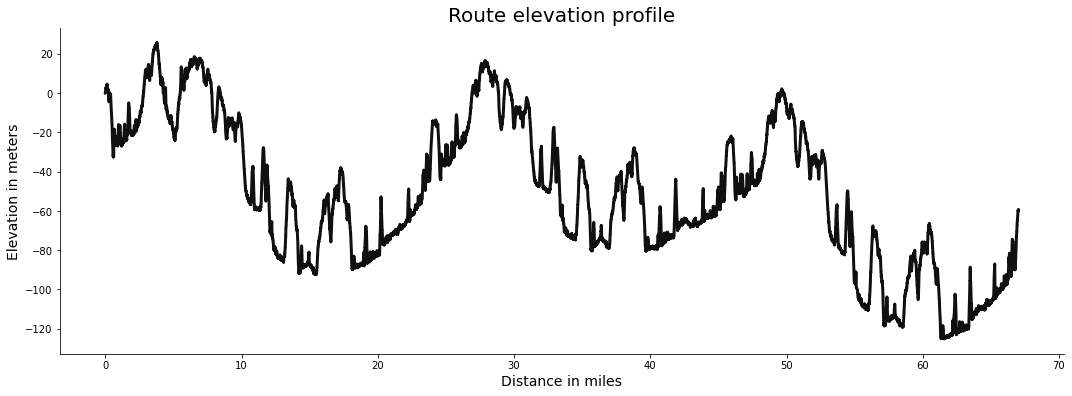

In [112]:
plt.figure(figsize=(18,6))
plt.plot(df['cum_distance'], df['cum_elevation'], color='#101010', lw=3)
plt.title('Route elevation profile', size=20)
plt.xlabel('Distance in miles', size=14)
plt.ylabel('Elevation in meters', size=14);

In [113]:
# df['5sec_rolling_elv'] = df['elevation_change'].rolling(5).mean()
df['second'] = df.index
# df[10:15]

In [114]:
# seconds to time
def sec_2_time(seconds):
    str_time = str(datetime.timedelta(seconds=seconds))
    return str_time
sec_2_time(3905)

'1:05:05'

In [115]:
# Adding Elapsed Time
def elapsed_time(row):
    time = str(datetime.timedelta(seconds=row['second']))
    return time

df['elapsed_time']= df.apply(elapsed_time, axis=1)

# Adding steps/distance in feet
df['step_feet'] = df['euc_dist'] * 5280
df.head()


,time,latitude,longitude,elevation,pointxyz,euc_dist,distance,euc_mph,elevation_change,cum_elevation,cum_distance,second,elapsed_time,step_feet
0,2021-12-04 11:31:03+00:00,38.576125,-77.412980,98.0,"(38.576125083491206, -77.41298032924533, 98.0)",0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,0:00:00,0.000000
1,2021-12-04 11:31:04+00:00,38.576111,-77.412989,98.0,"(38.576110918074846, -77.41298879496753, 98.0)",0.001079,0.001080,3.885364,0.0,0.0,0.001080,1,0:00:01,5.698533
2,2021-12-04 11:31:05+00:00,38.576098,-77.412999,98.0,"(38.576098177582026, -77.4129987694323, 98.0)",0.001031,0.001032,3.713378,0.0,0.0,0.002112,2,0:00:02,5.446287
3,2021-12-04 11:31:06+00:00,38.576086,-77.413008,98.0,"(38.5760856885463, -77.4130077380687, 98.0)",0.000989,0.000990,3.560057,0.0,0.0,0.003102,3,0:00:03,5.221417
4,2021-12-04 11:31:07+00:00,38.576070,-77.413020,98.0,"(38.576070349663496, -77.41301955655217, 98.0)",0.001237,0.001237,4.451406,0.0,0.0,0.004339,4,0:00:04,6.528729


In [116]:
# Identify times when runner is stopped or moving very slowly
def find_stops(row):
    if row['euc_mph'] < 1:
        return 0
    return 1

df['moving_time'] = df.apply(find_stops, axis=1)

In [117]:
df.step_feet.describe()

count    59640.000000
mean         5.963931
std          3.704672
min          0.000000
25%          4.262612
50%          5.772740
75%          7.387088
max        325.303904
Name: step_feet, dtype: float64

In [118]:
df['euc_dist'].sum()

67.36530907898653

In [119]:

strftime("%H:%M:%S", gmtime(3905))
'00:11:06'

'00:11:06'

In [120]:
# levels of gradient
# flat = 0
# slight up = 
# slight down <
# steep up > 0.5
# steep down < 0.5
labels = ['SteepD','SlightD','Flat','SlightU','SteepU']
custom_cut =[-100, -0.5, -0.25, 0.25, 0.5, 100]

#  do it over a set length of distance... not every step.

In [82]:
df.to_csv('data/df_add.csv', index=False)